In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

score = pd.read_csv(f'./models/maskFrance/Z64/yrs100/k.9.1fw2.1.2.lrs8skip2/score500.csv', index_col=1) 
score

,fold,C,TP,TN,FP,FN,MCC,entropy,skill,Brier,freq
0,0,1.000000e-03,0.0,735.0,0.0,35.0,0.000000,0.299829,-0.510356,0.072734,0.000000
1,0,1.000000e-02,0.0,735.0,0.0,35.0,0.000000,0.160851,0.189730,0.038056,0.000000
2,0,5.000000e-02,5.0,735.0,0.0,30.0,0.370479,0.142909,0.280112,0.034342,0.006494
3,0,1.000000e-01,6.0,733.0,2.0,29.0,0.346569,0.142746,0.280930,0.033868,0.010390
4,0,5.000000e-01,8.0,730.0,5.0,27.0,0.358557,0.145496,0.267078,0.033673,0.016883
...,...,...,...,...,...,...,...,...,...,...,...
7,9,1.000000e+02,0.0,707.0,12.0,51.0,-0.033510,0.250203,-0.260370,0.068415,0.015584
8,9,1.000000e+03,0.0,707.0,12.0,51.0,-0.033510,0.250239,-0.260555,0.068420,0.015584
9,9,1.000000e+05,0.0,707.0,12.0,51.0,-0.033510,0.250243,-0.260575,0.068421,0.015584
10,9,1.000000e+07,0.0,707.0,12.0,51.0,-0.033510,0.250243,-0.260575,0.068421,0.015584


In [2]:
score.groupby('C').mean().loc[0.1,'skill'], score.groupby('C').std().loc[0.1,'skill']

(0.16103977671133315, 0.17252183638195406)

In [15]:
def csv_to_score(folder, checkpoints):
    score=[]
    existing_checkpoints = []
    for i in checkpoints:
        if os.path.exists(f'{folder}/score{i}.csv'):
            score.append(pd.read_csv(f'{folder}/score{i}.csv', index_col=1) )
            existing_checkpoints.append(i)
    print(f'{existing_checkpoints = }')
    return pd.concat(score, keys=existing_checkpoints,names=['checkpoint', None])
score = csv_to_score('./models/maskFrance/Z64/yrs100/k.9.1fw2.1.2.lrs8skip2/',range(1,5000,1))
score

existing_checkpoints = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]


fold             C   TP     TN    FP    FN      MCC   entropy  \
checkpoint                                                                     
1          0      0  1.000000e-03  0.0  735.0   0.0  35.0  0.00000  0.316109   
           1      0  1.000000e-02  0.0  735.0   0.0  35.0  0.00000  0.201859   
           2      0  5.000000e-02  0.0  735.0   0.0  35.0  0.00000  0.194607   
           3      0  1.000000e-01  0.0  735.0   0.0  35.0  0.00000  0.194696   
           4      0  5.000000e-01  0.0  735.0   0.0  35.0  0.00000  0.195171   
...             ...           ...  ...    ...   ...   ...      ...       ...   
500        7      9  1.000000e+02  0.0  707.0  12.0  51.0 -0.03351  0.250204   
           8      9  1.000000e+03  0.0  707.0  12.0  51.0 -0.03351  0.250241   
           9      9  1.000000e+05  0.0  707.0  12.0  51.0 -0.03351  0.250245   
           10     9  1.000000e+07  0.0  707.0  12.0  51.0 -0.03351  0.250245   
           11     9  1.000000e+09  0.0  707.0  12.0  51.0 -0.03351  0.250245   

                  skill     Brier      freq  
checkpoint                                   
1          0  -0.592364  0.077469  0.000000  
           1  -0.016842  0.045841  0.000000  
           2   0.019688  0.044523  0.000000  
           3   0.019238  0.044462  0.000000  
           4   0.016849  0.044440  0.000000  
...                 ...       ...       ...  
500        7  -0.260378  0.068415  0.015584  
           8  -0.260562  0.068420  0.015584  
           9  -0.260582  0.068421  0.015584  
           10 -0.260582  0.068421  0.015584  
           11 -0.260582  0.068421  0.015584  

[1800 rows x 11 columns]

In [16]:
score.groupby(['checkpoint', 'C']).mean().loc[(slice(None), 0.1), 'skill']  # score.groupby(['checkpoint', 'C']).mean().loc[(10, 0.01), 'skill']  # to select specific

checkpoint  C  
1           0.1   -0.019783
10          0.1    0.151009
20          0.1    0.171461
30          0.1    0.176846
40          0.1    0.184942
50          0.1    0.184187
60          0.1    0.185686
70          0.1    0.185297
80          0.1    0.182477
90          0.1    0.183403
100         0.1    0.179589
200         0.1    0.171984
300         0.1    0.164017
400         0.1    0.158998
500         0.1    0.161040
Name: skill, dtype: float64

existing_checkpoints = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900]


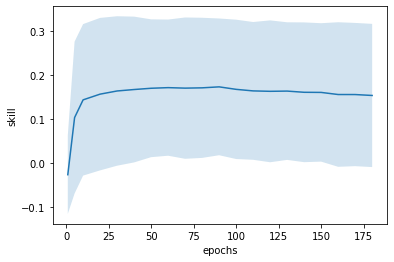

In [27]:
score = csv_to_score('./models/maskFrance/Z64/yrs100/k.9.1fw2.1.2.lrs8/',range(1,5000,1))
meanskillvsckpt = score.groupby(['checkpoint', 'C']).mean().loc[(slice(None), 0.1), 'skill'].droplevel(level=1)
stdskillvsckpt = score.groupby(['checkpoint', 'C']).std().loc[(slice(None), 0.1), 'skill'].droplevel(level=1)
maxiter=20
plt.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.2)
plt.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter])
plt.xlabel('epochs')
plt.ylabel('skill')
plt.savefig('Images/classification.png')

existing_checkpoints = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900]


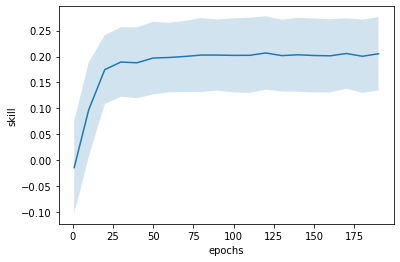

In [28]:
score = csv_to_score('./models/maskFrance/Z64/yrs100/k.9.1fw2..01.2.lrs8/',range(1,5000,1))
meanskillvsckpt = score.groupby(['checkpoint', 'C']).mean().loc[(slice(None), 0.1), 'skill'].droplevel(level=1)
stdskillvsckpt = score.groupby(['checkpoint', 'C']).std().loc[(slice(None), 0.1), 'skill'].droplevel(level=1)
maxiter=5
plt.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.2)
plt.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter])
plt.xlabel('epochs')
plt.ylabel('skill')
plt.savefig('Images/classification.png')